In [3]:
!pip install tweepy

    100% |████████████████████████████████| 143kB 3.4MB/s ta 0:00:01


In [8]:
!pip install python-decouple

  Running setup.py bdist_wheel for python-decouple ... done
  Stored in directory: /home/cwcollins/.cache/pip/wheels/0f/ee/80/75b684060dc6ecc5a28c07b75ef4063f378aff1a37556f342a
Successfully built python-decouple


In [1]:
import tweepy
from decouple import config

In [2]:
TWITTER_AUTH = tweepy.OAuthHandler(config('TWITTER_CONSUMER_KEY'),config('TWITTER_CONSUMER_SECRET'))

TWITTER_AUTH.set_access_token(config('TWITTER_ACCESS_TOKEN'),config('TWITTER_ACCESS_TOKEN_SECRET'))

TWITTER = tweepy.API(TWITTER_AUTH)

In [3]:
a = TWITTER.followers('@webdevmason', -1)

In [4]:
[ i.screen_name for i in a ]

['The_Heyoka',
 'braintheoryist',
 'OladipupoSharaf',
 'daoransky',
 'INVERSION_TO',
 'autogramblies',
 'ratlash',
 'UtomoTaufan',
 'humeser',
 'chrisbrownphd',
 'GauravMPatel',
 'kalturnbull',
 'matfitz',
 'motherwell',
 'normantasfi',
 'fallible_tweets',
 'chuck_petty',
 'JohnMacGaffey',
 'excinera',
 'hypaitia']

In [5]:
import re

In [6]:
twitter_user = TWITTER.get_user('webdevmason')

In [7]:
def get_interactions(search):
    index.append(search)
    twitter_user = TWITTER.get_user(search)
    tweets = twitter_user.timeline(
                count=1000,
                exclude_replies=False,
                include_rts=True,
                tweet_mode='extended'
    )
    b = [ i.full_text for i in tweets ]
    b = " ".join(b)
    interactions = re.findall(r'(?<=^|(?<=[^a-zA-Z0-9-_\.]))@([A-Za-z]+[A-Za-z0-9-_]+)',b)
    interactions = " ".join(interactions)
    interactions = interactions.replace(search,"")
    interactions_list.append(interactions)

In [8]:
%%time
index = []
interactions_list = []
get_interactions("webdevmason")
get_interactions("devonzuegel")
get_interactions("patrickc")
get_interactions("collision")
get_interactions("austen")
get_interactions("ryanallred")
get_interactions("paulg")
get_interactions("naval")
get_interactions("trevmckendrick")
get_interactions("bwinterrose")
get_interactions("crawfteevee")
get_interactions("elonmusk")

Wall time: 12.4 s


In [9]:
index

['webdevmason',
 'devonzuegel',
 'patrickc',
 'collision',
 'austen',
 'ryanallred',
 'paulg',
 'naval',
 'trevmckendrick',
 'bwinterrose',
 'crawfteevee',
 'elonmusk']

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = interactions_list
vectorizer = CountVectorizer(min_df=2)
X = vectorizer.fit_transform(corpus)

In [11]:
import pandas as pd
pd.set_option("display.max_columns", 250)

In [12]:
display_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names(), index = index)

In [13]:
display_df

,adamsinger,alanmcole,alexeyguzey,altimor,amasad,andreasklinger,andrewchen,andy_matuschak,ariannasimpson,armadsen,artirkel,ashleymcnamara,assetdesignnetw,asteroid_saku,at_neuner,austen,austenallred,avibryant,bhorowitz,bjc290,briantheligman,bryce,bwinterrose,byrosenberg,calebhicks,calebwatney,chrisalbon,cindybisv,clairlemon,collision,craigmod,daniel_egan,danielgross,daviddeutschoxf,dellannaluca,destraynor,devonzuegel,dps,econtalker,eladgil,elonmusk,ericjorgenson,ericrweinstein,eriktorenberg,esyudkowsky,fchollet,gabegundy,garrytan,google,homsit,humansofny,hunterwalk,impcapital,informema,ivanahuckova,jack,james_ough,jamiesmallwood,jason,jdan,jeff_weinstein,jeremyphoward,jessfraz,jesslivingston,jkhowland,jlhenriod,jmj,joelgrus,jonathan_blow,jordanlaubaugh,juliagalef,justglew,justinkan,justsaysinmice,kaggle,karendzachary,karpathy,kays310,kevinakwok,kevinsimler,kylebrussell,lamaalrajih,lambdaschool,laurabehrenswu,lpolovets,mandalane_,markdalgleish,marklutter,mckaywrigley,michael_nielsen,micsolana,mitchellbwright,mitchellgbudge,mkbhd,mmay3r,msuster,nasa,natesilver538,natfriedman,naval,nayafia,nileshtrivedi,noahpinion,notionhq,orbuch,osemenime,ouraring,patio11,patrickc,paulg,paulskallas,pioneerdotapp,placebocapital,pmarca,primalpoly,producthunt,pt,ptraughber,rabois,raydalio,realtimeai,reddit,rivatez,romainhuet,roybahat,rrherr,rrhoover,rsnous,runvc,ryan_holdaway,ryanallred,ryanleehamblin,samuelruback,scott_wiener,shl,sknthla,spakhm,starsandrobots,stephen_walter,stewartalsopiii,stewartbrand,stripe,stripepress,suhail,superhuman,tarstarr,taylorpearsonme,tesla,theannagat,theonion,thestoicemperor,timhwang,tommycollison,trentmano,trevmckendrick,tylercowen,typesfast,valaafshar,visakanv,webdevmason,wellpaidgeek,whosimmortal,william_r_kerr,wrathofgnon,xchinmay,xkcdcomic,ycombinator,zackkanter,zoom_us
webdevmason,0,0,0,0,0,0,0,6,0,0,1,0,0,0,0,11,0,0,0,0,2,0,0,0,0,0,0,0,2,0,0,0,1,2,2,0,0,0,0,0,0,0,2,0,0,0,0,0,0,8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,0,1,0,0,0,0,0,0,0,0,19,0,0,0,0,0,0,0,0,0,6,2,0,0,0,0,0,0,0,0,0,0,1,0,3,0,0,0,0,1,10,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,9,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,11,1,0,0,0,0,0,0,0,2,0
devonzuegel,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,2,0,0,0,0,1,0,0,0,0,4,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,4,0,5,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,0,0,0,0,4,0,0,0,0,0,0,0,0,0,2,0,2,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
patrickc,0,0,2,0,0,0,0,0,0,0,5,0,0,0,0,0,0,1,1,0,0,0,0,3,0,1,0,0,0,3,1,0,2,1,0,0,9,1,3,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,2,0,3,0,0,0,0,0,1,0,10,1,0,1,1,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,1,0,2,0,4,0,1,0,1,5,0,1,0,1,0,0,1,0,0,2,0,0,0,0,1,1,4,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,2,16,4,0,2,1,0,3,0,0,0,0,1,0,0,4,0,0,0,0,0,0,1,0,0,0,0,0,0
collision,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,2,3,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,3,3,1,0,3,0,0,0,0,0,0,0,0,2,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2,0,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,5,25,0,0,4,0,0,0,0,3,0,2,0,0,0,0,2,0,0,2,0,0,0,0,0,0,8,1,1,0,1,0,0,0,21,2,0,0,1,0,0,0,0,0,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
austen,1,0,0,0,0,2,0,0,3,0,0,0,1,0,1,2,0,0,0,1,0,0,0,0,0,0,0,0,3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,34,0,2,2,0,0,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,3,0,0,0,0,0,0,0,0,0
ryanallred,1,1,0,1,0,0,0,0,0,1,0,0,1,0,2,43,0,0,0,1,0,1,2,1,7,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,3,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,2,0,0,1,1,0,0,2,2,0,0,3,0,0,0,0,1,0,1,0,0,1,0,26,0,0,0,1,0,4,0,0,1,1,1,1,0,0,1,1,1,0,0,2,0,0,0,0,3,1,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,1,5,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,2,0,0,0,0,4,0,1,1,2,0,0,2,1,0,0,0,0,1,0,0,0
paulg,0,0,0,0,6,2,0,0,2,0,0,0,0,0,0,11,0,1,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0

In [14]:
#!pip install plotly

In [15]:
#!pip install python-igraph

In [16]:
#!pip install networkx

In [17]:
import networkx as nx
import matplotlib.pyplot as plt

In [18]:
DG=nx.MultiGraph()


In [19]:
#loop through index, then the columns to find non-zero connections.
for i in display_df.index.values:
    for j in display_df.columns:
        if display_df[j].loc[i] >0 :
            DG.add_edge(j,i,display_df[j].loc[i] )
        else:
            pass

In [20]:
DG.nodes()

NodeView(('andy_matuschak', 'webdevmason', 'artirkel', 'austen', 'briantheligman', 'clairlemon', 'danielgross', 'daviddeutschoxf', 'dellannaluca', 'ericrweinstein', 'homsit', 'humansofny', 'jonathan_blow', 'juliagalef', 'kevinsimler', 'michael_nielsen', 'micsolana', 'nileshtrivedi', 'notionhq', 'patrickc', 'paulg', 'primalpoly', 'samuelruback', 'spakhm', 'theannagat', 'thestoicemperor', 'trevmckendrick', 'visakanv', 'zackkanter', 'amasad', 'devonzuegel', 'ashleymcnamara', 'craigmod', 'daniel_egan', 'econtalker', 'impcapital', 'informema', 'james_ough', 'jeremyphoward', 'justsaysinmice', 'kevinakwok', 'laurabehrenswu', 'markdalgleish', 'marklutter', 'natfriedman', 'nayafia', 'orbuch', 'ptraughber', 'realtimeai', 'reddit', 'rivatez', 'rsnous', 'starsandrobots', 'stewartalsopiii', 'theonion', 'timhwang', 'alexeyguzey', 'avibryant', 'bhorowitz', 'byrosenberg', 'calebwatney', 'collision', 'dps', 'elonmusk', 'jeff_weinstein', 'jessfraz', 'karpathy', 'lamaalrajih', 'lambdaschool', 'noahpinion

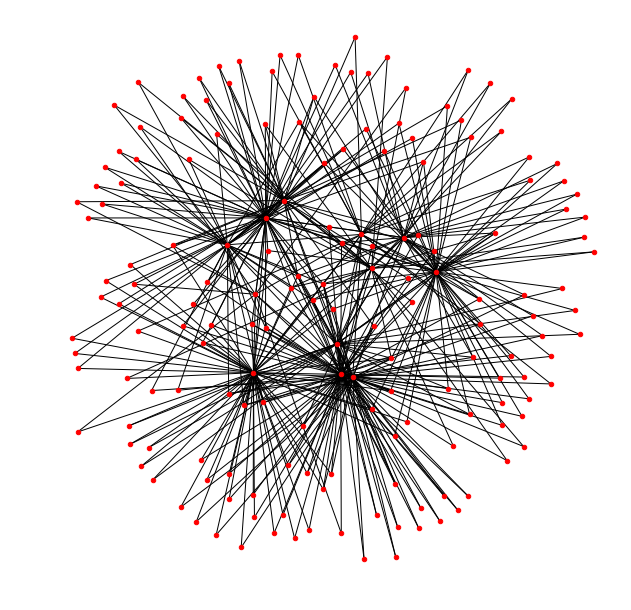

In [21]:
fig = plt.figure(figsize=(8,8))
nx.draw_kamada_kawai(DG,node_size=20 )

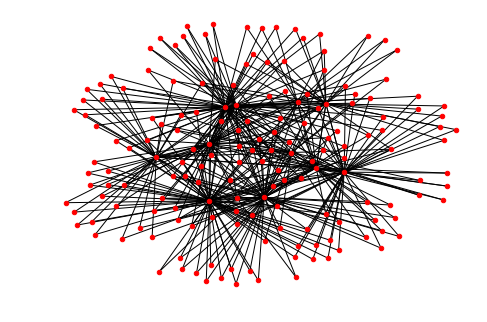

In [22]:
nx.draw(DG,node_size=20 )

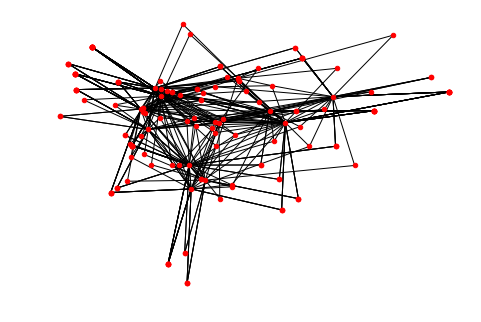

In [23]:
nx.draw_spectral(DG,node_size=20)

In [24]:
DG.size()

439

In [25]:
degrees = [DG.degree(node) for node in DG]
kmin = min(degrees)
kmax = max(degrees)

In [26]:
DG.degree("webdevmason")

34

In [170]:
pos = nx.kamada_kawai_layout(DG)

In [171]:
pos_and_name = [("X","Y","Name","importance")]
for i in pos:
    pos_and_name.append( (pos[i][0],pos[i][1], i, DG.degree[i]) )

In [183]:
import numpy as np
nx.adjacency_matrix(DG).toarray()

array([[0, 1, 0, ..., 0, 0, 0],
       [1, 1, 2, ..., 0, 1, 0],
       [0, 2, 1, ..., 0, 1, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 1, 0]], dtype=int32)

In [173]:
import csv
with open('nodes.csv', 'w') as csvfile:
    writer = csv.writer(csvfile, delimiter=',')
    for i in range(len(pos_and_name)):
        writer.writerow(pos_and_name[i])

In [174]:
pos

{'artirkel': array([0.00816717, 0.25129066]),
 'webdevmason': array([0.27452732, 0.14611688]),
 'austen': array([-0.00330454, -0.15134843]),
 'briantheligman': array([0.80704186, 0.59514784]),
 'clairlemon': array([0.85229101, 0.05315028]),
 'danielgross': array([-0.12635394,  0.11153663]),
 'daviddeutschoxf': array([0.00471157, 0.87760491]),
 'dellannaluca': array([0.86442212, 0.50380697]),
 'ericrweinstein': array([0.37550099, 0.48479267]),
 'homsit': array([ 0.76843702, -0.34388575]),
 'jonathan_blow': array([-0.00363477,  0.7632565 ]),
 'kevinsimler': array([0.422662  , 0.44688655]),
 'michael_nielsen': array([0.14102528, 0.24949733]),
 'micsolana': array([0.73892036, 0.67588609]),
 'nileshtrivedi': array([0.89977559, 0.2418868 ]),
 'notionhq': array([ 0.75123114, -0.26524504]),
 'patrickc': array([-0.19331292,  0.34503382]),
 'paulg': array([ 0.33849092, -0.03293374]),
 'primalpoly': array([0.14939904, 0.89266949]),
 'samuelruback': array([ 0.74011934, -0.17784015]),
 'spakhm': ar

In [175]:
df = nx.to_pandas_edgelist(DG)
df["X1"] = df["source"].apply(lambda x: pos[x][0])
df["Y1"] = df["source"].apply(lambda x: pos[x][1])
df["X2"] = df["target"].apply(lambda x: pos[x][0])
df["Y2"] = df["target"].apply(lambda x: pos[x][1])
df.head(10)

,source,target,X1,Y1,X2,Y2
0,artirkel,webdevmason,0.008167,0.251291,0.274527,0.146117
1,artirkel,patrickc,0.008167,0.251291,-0.193313,0.345034
2,artirkel,bwinterrose,0.008167,0.251291,0.065831,-0.274098
3,webdevmason,austen,0.274527,0.146117,-0.003305,-0.151348
4,webdevmason,austen,0.274527,0.146117,-0.003305,-0.151348
5,webdevmason,briantheligman,0.274527,0.146117,0.807042,0.595148
6,webdevmason,clairlemon,0.274527,0.146117,0.852291,0.053150
7,webdevmason,danielgross,0.274527,0.146117,-0.126354,0.111537
8,webdevmason,daviddeutschoxf,0.274527,0.146117,0.004712,0.877605
9,webdevmason,dellannaluca,0.274527,0.146117,0.864422,0.503807


In [176]:
import csv
with open('edges.csv', 'w') as csvfile:
    writer = csv.writer(csvfile, delimiter=',')
    for i in range(len(df)):
        writer.writerow([df["X1"][i],df["Y1"][i],i])
        writer.writerow([df["X2"][i],df["Y2"][i],i])
        writer.writerow(["","",i])

In [154]:
el = nx.to_pandas_edgelist(DG)

In [168]:
el

,source,target
0,artirkel,webdevmason
1,artirkel,patrickc
2,artirkel,bwinterrose
3,webdevmason,austen
4,webdevmason,austen
5,webdevmason,briantheligman
6,webdevmason,clairlemon
7,webdevmason,danielgross
8,webdevmason,daviddeutschoxf
9,webdevmason,dellannaluca


In [163]:
elj = el.to_json(orient='records')

In [166]:
elj

'[{"source":"artirkel","target":"webdevmason"},{"source":"artirkel","target":"patrickc"},{"source":"artirkel","target":"bwinterrose"},{"source":"webdevmason","target":"austen"},{"source":"webdevmason","target":"austen"},{"source":"webdevmason","target":"briantheligman"},{"source":"webdevmason","target":"clairlemon"},{"source":"webdevmason","target":"danielgross"},{"source":"webdevmason","target":"daviddeutschoxf"},{"source":"webdevmason","target":"dellannaluca"},{"source":"webdevmason","target":"ericrweinstein"},{"source":"webdevmason","target":"homsit"},{"source":"webdevmason","target":"jonathan_blow"},{"source":"webdevmason","target":"kevinsimler"},{"source":"webdevmason","target":"michael_nielsen"},{"source":"webdevmason","target":"micsolana"},{"source":"webdevmason","target":"nileshtrivedi"},{"source":"webdevmason","target":"notionhq"},{"source":"webdevmason","target":"patrickc"},{"source":"webdevmason","target":"paulg"},{"source":"webdevmason","target":"paulg"},{"source":"webdevma